In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import xlrd
import os
warnings.filterwarnings("ignore")
plt.style.use("fivethirtyeight")
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 14
matplotlib.rcParams['ytick.labelsize'] = 14
matplotlib.rcParams['text.color'] = 'b'

In [19]:
df1=pd.read_excel(' Superstore.xls')
                 

In [3]:
df2=pd.read_excel('Super.xls')

In [4]:
df3=[df1,df2]
df=pd.concat(df3)

In [5]:

len(df)

19988

In [6]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture['Order Date'].min(), furniture['Order Date'].max()

(Timestamp('2010-01-06 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [7]:


furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,0.00,219.5820
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,0.45,-383.0310
5,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,0.00,14.1694
10,11,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,0.20,85.3092
23,24,US-2017-156909,2017-07-16,2017-07-18,Second Class,SF-20065,Sandra Flanagan,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-CH-10002774,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray",71.3720,0.30,-1.0196
24,25,CA-2015-106320,2015-09-25,2015-09-30,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,Utah,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.6300,0.00,240.2649
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,0.50,-1665.0522
29,30,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,Pennsylvania,19140,East,FUR-FU-10004848,Furniture,Furnishings,"Howard Miller 13-3/4"" Diameter Brushed Chrome ...",124.2000,0.20,15.5250
36,37,CA-2016-117590,2016-12-08,2016-12-10,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,Texas,75080,Central,FUR-FU-10003664,Furniture,Furnishings,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,0.60,-147.9630


In [8]:
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 
        'Discount', 'Profit']
furniture.drop(cols, axis=1, inplace=True)
furniture = furniture.sort_values('Order Date')
furniture.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [9]:



furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
furniture.index
y = furniture['Sales'].resample('MS').mean()
y['2017':]

Order Date
2017-01-01     397.602133
2017-02-01     528.179800
2017-03-01     544.672240
2017-04-01     453.297905
2017-05-01     678.302328
2017-06-01     826.460291
2017-07-01     562.524857
2017-08-01     857.881889
2017-09-01    1209.508583
2017-10-01     875.362728
2017-11-01    1277.817759
2017-12-01    1256.298672
Freq: MS, Name: Sales, dtype: float64

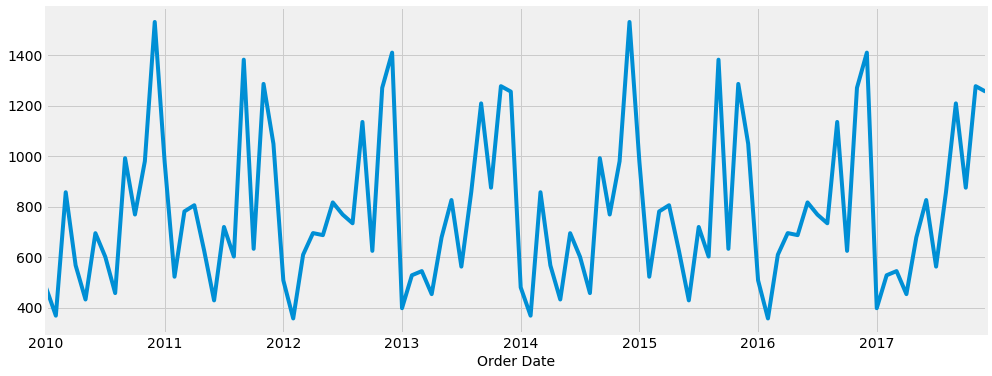

In [10]:
y['2017':]
y.plot(figsize=(15, 6))
plt.show()

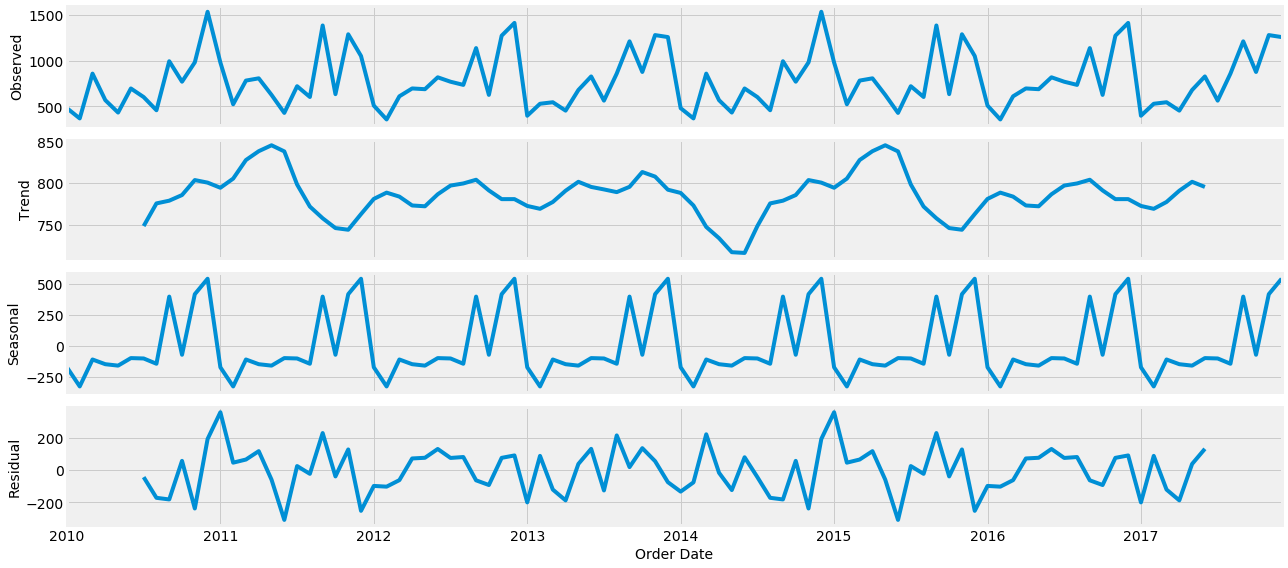

In [11]:


from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [12]:


p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [13]:

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1551.805876389275
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1286.8168121873705
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1135.2168125120231
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:924.7593185580572
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1153.849102417941
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1099.002190840477
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:964.2417850505946
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:926.6808312800512
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1466.608040476764
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1231.653320044425
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1123.5188722872654
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:914.1303889655334
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1154.6696031194906


/home/keerthana/mainproject/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1091.591447855203
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:966.1575214601621
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:916.0487505736663
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1385.5126257248323
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1182.7783277696205
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:1171.3908936064815
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:955.3567636068381
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:1174.4383673140887
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1133.8324137448963
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:997.234329866444
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:956.9737755340819
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1335.6620844363429
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1135.0771220777262
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:1117.3266569290631
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:904.5871725177699
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:1137.412312263469
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1080.0186483906562
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:957.6411837735882
AR

/home/keerthana/mainproject/lib/python3.5/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1150.6053071825193
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:1125.3929238638855
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:915.8729932477503
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:1138.3188497741098
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1090.2018714281344
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:947.6967411179185
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:914.8285173126515
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:1372.2029210722299
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1169.267391956718
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:1152.7998394921663
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:938.0716516361344
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:1141.7506266824207
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1113.6715196835244
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:964.1284282825444
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:938.0775043006315
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:1332.8403438812295
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1134.088472862286
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:1118.246944248188
A

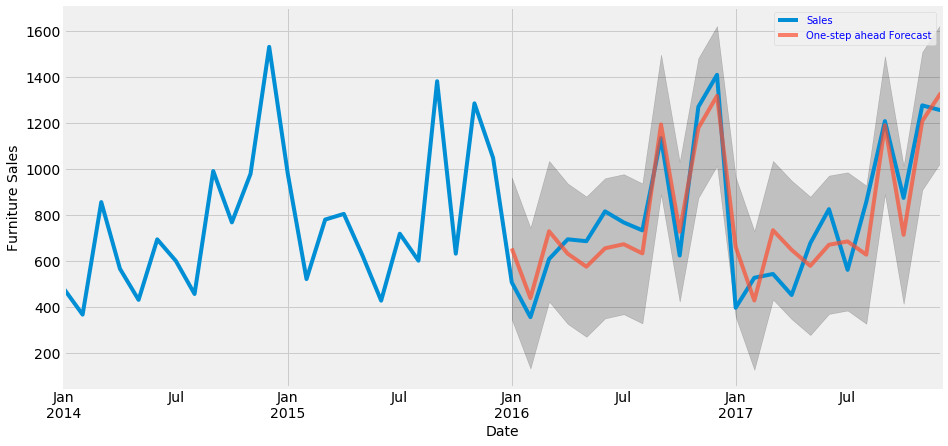

In [22]:



pred = results.get_prediction(start=pd.to_datetime('2016-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2014':].plot()
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()


Text(37.89, 0.5, 'Furniture Sales')

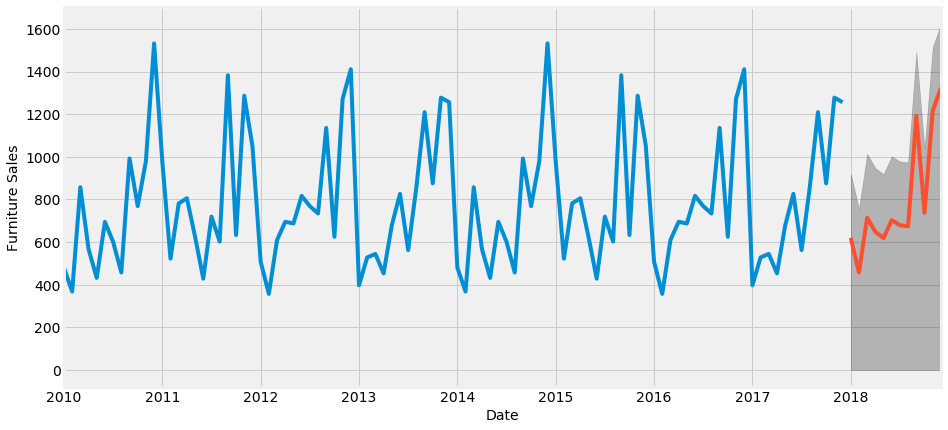

In [15]:
pred_uc = results.get_forecast(steps=12)
pred_ci = pred_uc.conf_int()

ax = y.plot(label='observed', figsize=(14, 7))

(pred_uc.predicted_mean.plot(ax=ax, label='Forecast')).get_figure().savefig('keer.png')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
# plt.show()
# fig=plt.figure()
# fig.savefig('plot.png')


In [16]:

import pickle 
  
# Save the trained model as a pickle string. 
saved_model2 = pickle.dumps(results) 
  
# Load the pickled model 
knn_from_pickle = pickle.loads(saved_model2) 
  
# Use the loaded pickled model to make predictions 
from sklearn.externals import joblib 
  
# Save the model as a pickle in a file 
joblib.dump(results, 'filename1.pkl') 

['filename1.pkl']

In [17]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = np.sqrt((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 139.87


In [18]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 11.83
